1.  What is Anomaly Detection? Explain its types (point, contextual, and 
collective anomalies) with examples.

Ans- Anomaly detection is the process of identifying rare data points or events that deviate significantly from a normal or expected pattern, often signaling issues like fraud, system failures, or cyberattacks. The three main types are: Point Anomalies, where a single data point is an outlier; Contextual Anomalies, where a data point is anomalous only within a specific context; and Collective Anomalies, where a group of data points, though individually normal, collectively form a pattern of unusual behavior. 

2.  Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of 
their approach and suitable use cases. 

Ans- Isolation Forest uses random partitioning to isolate outliers quickly in high-dimensional, large datasets, while DBSCAN identifies dense clusters and marks points in low-density regions as noise, making it suitable for spatial/geometric data with arbitrary cluster shapes. Local Outlier Factor (LOF) is a density-based method that detects anomalies based on a point's local density compared to its neighbors and excels in datasets with varying densities and local anomalies. 

3. What are the key components of a Time Series? Explain each with one 
example. 

Ans-<br>
<b> 1. Level </b>

--> Definition: The baseline or average value around which the time series fluctuates, without considering trend, seasonality, or cycles.

--> Example: If a company’s monthly sales mostly revolve around ₹10,00,000, that’s the level.

<b> 2. Trend (T)</b>

--> Long-term increase or decrease.

--> Example: India’s population steadily rising.

<b> 3. Seasonality (S)</b>

--> Repeating short-term pattern at fixed intervals.

--> Example: Ice cream sales peaking every summer.

<b>4. Cyclic (C)</b>

-->Long-term wavelike pattern, not of fixed length, often linked to economic cycles.

--> Example: Stock market booms and recessions.

<b> 5. Irregular/Random (I)</b>

--> Unpredictable variations due to unusual events.

--> Example: Airline travel drop during COVID-19.

4.  Define Stationary in time series. How can you test and transform a 
non-stationary series into a stationary one? 

Ans-<br>
A time series is stationary if its mean, variance, and autocovariance stay constant over time (no trend or seasonality).

##### How to Test Stationarity

---> Plot the series → look for trend/seasonality.

##### Statistical tests:

---> ADF test → p < 0.05 ⇒ stationary.

---> KPSS test → p > 0.05 ⇒ stationary.

##### How to Make Non-Stationary Series Stationary

---> Differencing (subtract previous values).

---> Transformations (log, square root, Box-Cox).

---> Detrending (remove trend line).

---> Decomposition (remove trend & seasonality).

5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in 
terms of structure and application. 


Ans- <br>
## 1. AR (Autoregressive Model)
- **Structure:** Current value depends on past values.  
- **Formula:**  
  \[
  Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \epsilon_t
  \]  
- **Application:** Captures momentum/trend.

## 2. MA (Moving Average Model)
- **Structure:** Current value depends on past forecast errors.  
- **Formula:**  
  \[
  Y_t = c + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \epsilon_t
  \]  
- **Application:** Captures short-term shocks.


## 3. ARIMA (AutoRegressive Integrated Moving Average)
- **Structure:** Combines AR + differencing (I) + MA.  
- **Notation:**  
  \[
  ARIMA(p, d, q)
  \]  
  - **p** = AR terms  
  - **d** = Differencing (to remove trend)  
  - **q** = MA terms  
- **Application:** Non-seasonal data with trend.


## 4. SARIMA (Seasonal ARIMA)
- **Structure:** ARIMA with seasonal components.  
- **Notation:**  
  \[
  ARIMA(p, d, q) \times (P, D, Q, s)
  \]  
  - **P** = Seasonal AR  
  - **D** = Seasonal differencing  
  - **Q** = Seasonal MA  
  - **s** = Season length  
- **Application:** Data with seasonality (e.g., monthly sales, quarterly demand).


## 5. SARIMAX (Seasonal ARIMA with Exogenous Variables)
- **Structure:** SARIMA + external predictors (X).  
- **Formula:**  
  \[
  Y_t = \text{SARIMA terms} + \beta X_t + \epsilon_t
  \]  
- **Application:** Seasonal data influenced by external factors (e.g., sales affected by holidays, promotions, or weather).



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

6.  Load a time series dataset (e.g., AirPassengers), plot the original series, 
and decompose it into trend, seasonality, and residual components

<Figure size 2000x1000 with 0 Axes>

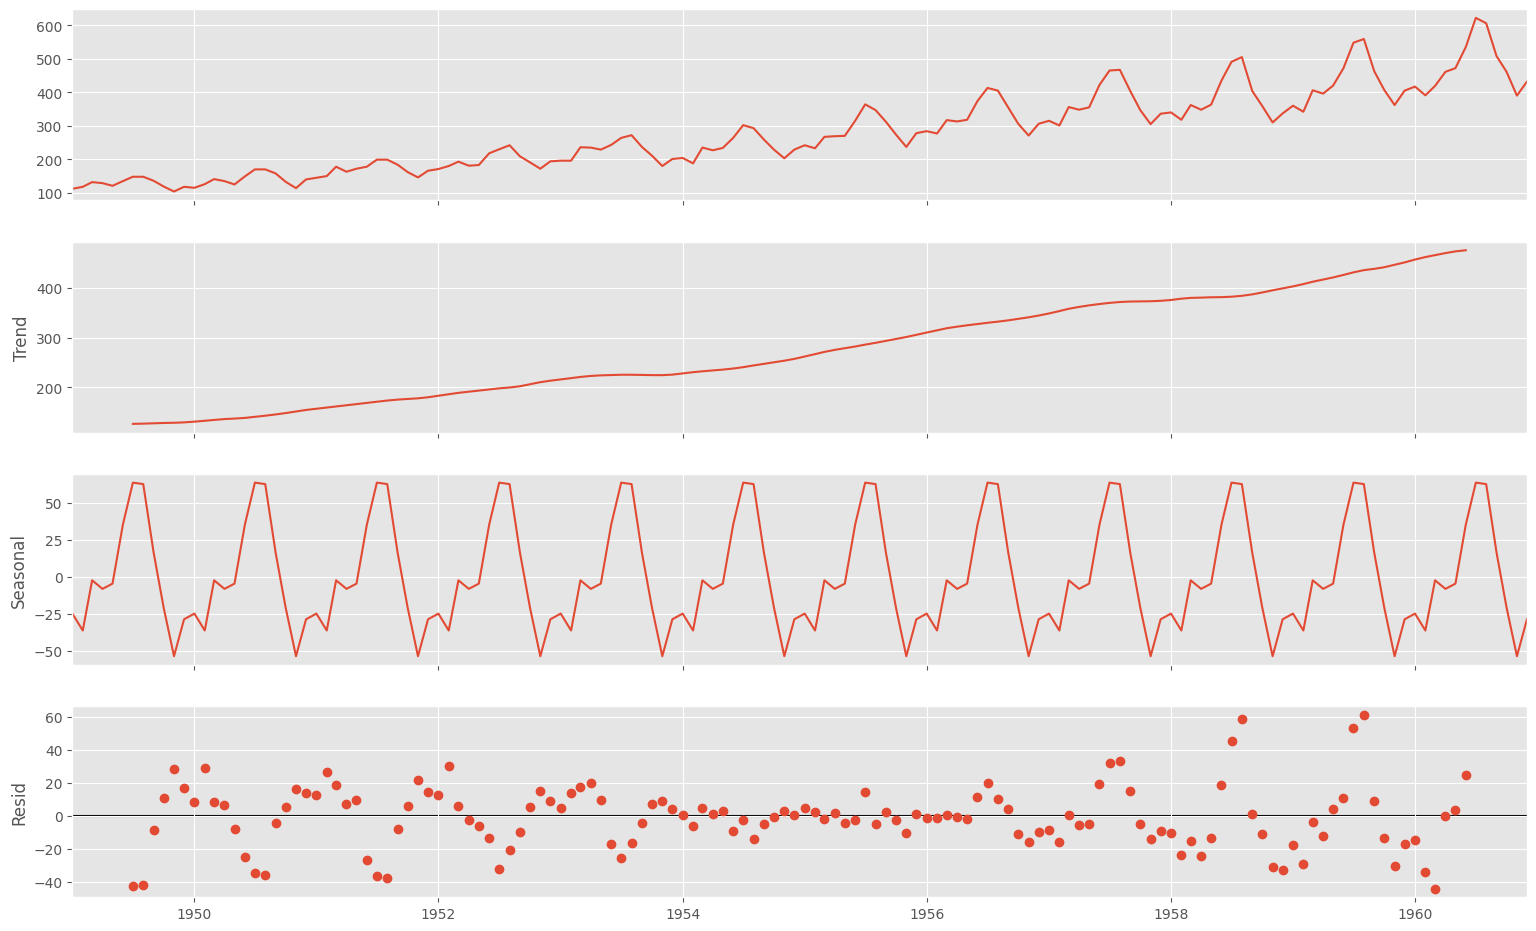

In [2]:
passengers = pd.read_csv('AirPassengers.csv')
passengers['Month'] = pd.to_datetime(passengers['Month'])
passengers = passengers.set_index('Month')

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(passengers[['#Passengers']], period = 12)

fig = plt.figure(figsize = (20, 10))
fig = result.plot()
fig.set_size_inches(17, 10)
plt.show()

7.  Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to 
detect anomalies. Visualize the anomalies on a 2D scatter plot.

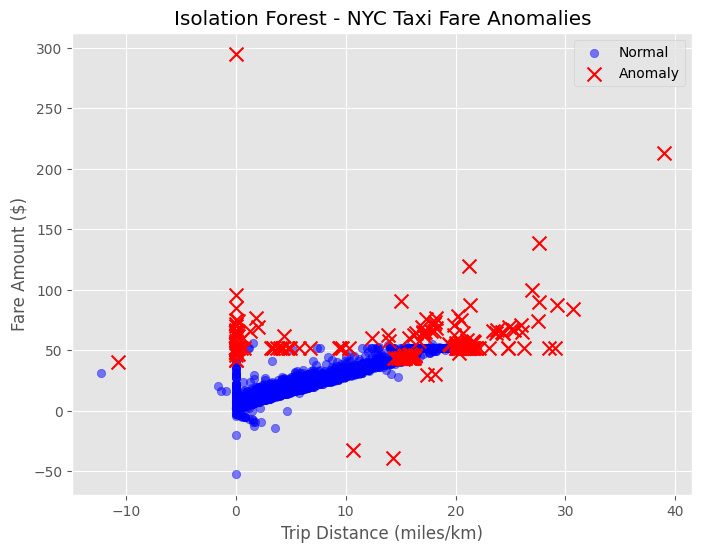

In [8]:
from sklearn.ensemble import IsolationForest

df = pd.read_csv('NYC_taxi_fare_data.csv')

df = df[['fare_amount', 'trip_distance']].dropna()

df_sample = df.sample(10000, random_state=42)

X = df_sample.values

clf = IsolationForest(contamination=0.02, random_state=42)
y_pred = clf.fit_predict(X)

plt.figure(figsize=(8,6))

plt.scatter(X[y_pred == 1, 1], X[y_pred == 1, 0], 
            c="blue", label="Normal", alpha=0.5)

plt.scatter(X[y_pred == -1, 1], X[y_pred == -1, 0], 
            c="red", label="Anomaly", marker="x", s=100)

plt.xlabel("Trip Distance (miles/km)")
plt.ylabel("Fare Amount ($)")
plt.title("Isolation Forest - NYC Taxi Fare Anomalies")
plt.legend()
plt.show()

8.  Train a SARIMA model on the monthly airline passengers dataset. 
Forecast the next 12 months and visualize the results. 

c:\Users\siddh\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\siddh\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


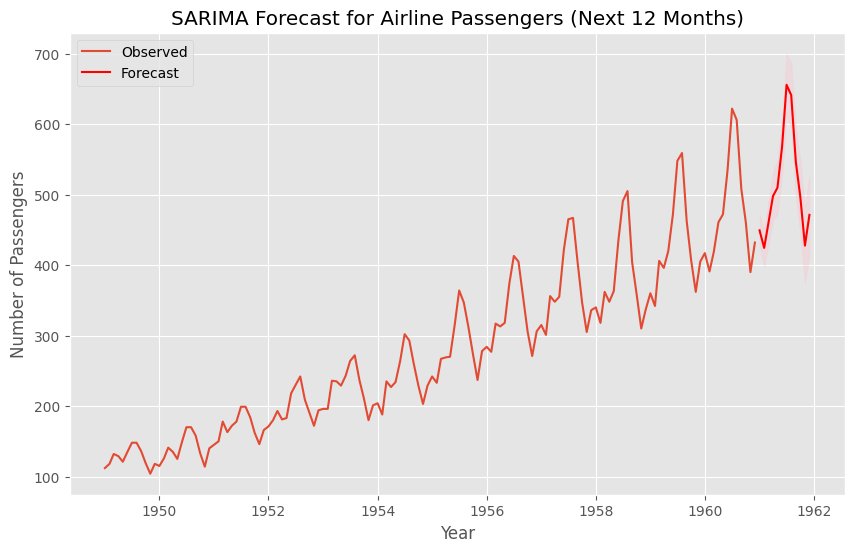

In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')

y = df['#Passengers']

model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

forecast = results.get_forecast(steps=12)
pred_ci = forecast.conf_int()

plt.figure(figsize=(10,6))
plt.plot(y.index, y, label="Observed")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, 
         label="Forecast", color='red')

plt.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], 
                 color='pink', alpha=0.3)

plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.title("SARIMA Forecast for Airline Passengers (Next 12 Months)")
plt.legend()
plt.show()


9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect 
anomalies and visualize them using matplotlib. 

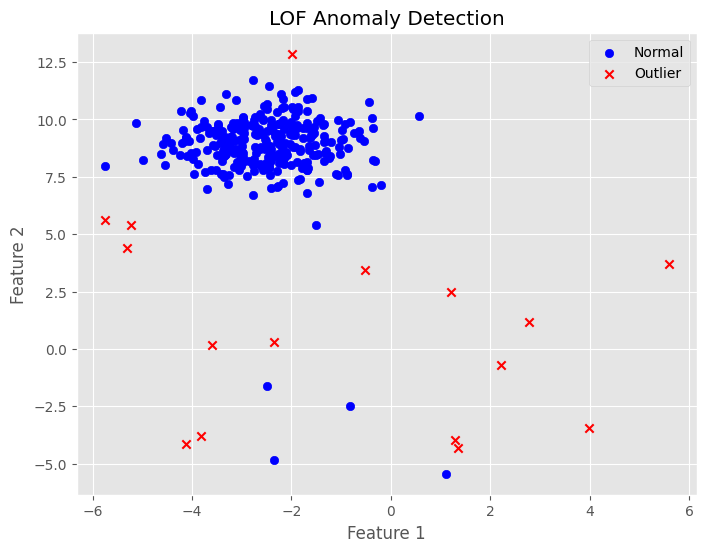

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import LocalOutlierFactor

X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0, random_state=42)

np.random.seed(42)
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))
X = np.vstack([X, outliers])

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(X)
scores = lof.negative_outlier_factor_

plt.figure(figsize=(8,6))
plt.title("LOF Anomaly Detection")
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue', label='Normal')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', label='Outlier', marker='x')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

10. You are working as a data scientist for a power grid monitoring company. 
Your goal is to forecast energy demand and also detect abnormal spikes or drops in 
real-time consumption data collected every 15 minutes. The dataset includes features 
like timestamp, region, weather conditions, and energy usage. <br>
<br>Explain your real-time data science workflow: 
<br>● How would you detect anomalies in this streaming data (Isolation Forest / LOF / 
DBSCAN)? 
<br>● Which time series model would you use for short-term forecasting (ARIMA / 
SARIMA / SARIMAX)? 
<br>● How would you validate and monitor the performance over time? 
<br>● How would this solution help business decisions or operations?

Ans-

### 1 Real-Time Anomaly Detection

The goal is to detect abnormal spikes or drops in energy consumption. Given the data is collected every 15 minutes:

Methods you could use:

Isolation Forest (IF):

Works well for high-dimensional streaming data.

Detects anomalies by isolating points that are “few and different.”

Can be applied incrementally using a sliding window of recent consumption values.

Local Outlier Factor (LOF):

Measures the local density deviation of a point compared to its neighbors.

Good for detecting contextual anomalies (e.g., sudden spike only in this region).

Needs care for streaming data — use mini-batch or windowed LOF.

DBSCAN:

Density-based clustering, flags points not belonging to any cluster.

Not ideal for real-time streaming because it requires recalculating clusters continuously.

Recommended approach:

Use Isolation Forest or LOF with a rolling window because they are fast and suitable for near real-time anomaly detection.

### 2. Short-Term Forecasting

For predicting energy demand in the next few intervals:

ARIMA:

Good for stationary univariate time series.

Simple and interpretable.

SARIMA:

Handles seasonality (daily or weekly cycles) which is common in energy usage.

Ideal for 15-minute interval data because patterns repeat every day/week.

SARIMAX:

Extends SARIMA to include exogenous variables (weather, temperature, day type).

Highly recommended here because energy demand is influenced by temperature, holidays, etc.

Recommended approach:

SARIMAX with exogenous features (weather, holidays, region) for accurate short-term forecasting.

### 3. Validation and Monitoring

Validation:

Split historical data into train/test with a rolling-window approach.

Use metrics like:

MAE / RMSE for forecast accuracy.

Precision/Recall/F1-score for anomaly detection.

Monitoring:

Compare predicted vs actual energy usage continuously.

Track forecast errors over time to detect model drift.

Retrain models periodically as consumption patterns change.

### 4. Business Impact

This solution helps operations in multiple ways:

Grid Stability: Detects abnormal spikes or drops in near real-time → prevent blackouts or overloading.

Resource Planning: Accurate forecasts allow scheduling generators and energy storage efficiently.

Demand Response: Alerts can trigger automatic demand reduction or shifting during peak hours.

Cost Savings: Optimizes energy generation and distribution based on predicted demand.

Customer Satisfaction: Reduces outages and ensures reliable power supply.